# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [90]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [10]:
# Set the default seaborn theme for the notebook
sns.set_theme()

In [3]:
# load dataset
EDA_df = pd.read_csv('diabetes.csv')

Get an overview of the dataframe

In [4]:
# get an overview of the dataframe
EDA_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
EDA_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
EDA_df.shape

(768, 9)

In [7]:
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# checking for null values
EDA_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# drop duplicate rows
EDA_df = EDA_df.drop_duplicates()

In [15]:
EDA_df.shape

(768, 9)

* Dataset contains only numeric columns
* Dataset does not appear to contain duplicates
* Dataset does not appear to contain nulls encoded as NaN. 
* However, some typical non-zero attributes like `SkinThickness` and `Insulin` seem to have zero values
* Hence, the `SkinThickness` and `Insulin` attributes will be explored further

Let us examine the distributions of the attributes using histograms and box plots

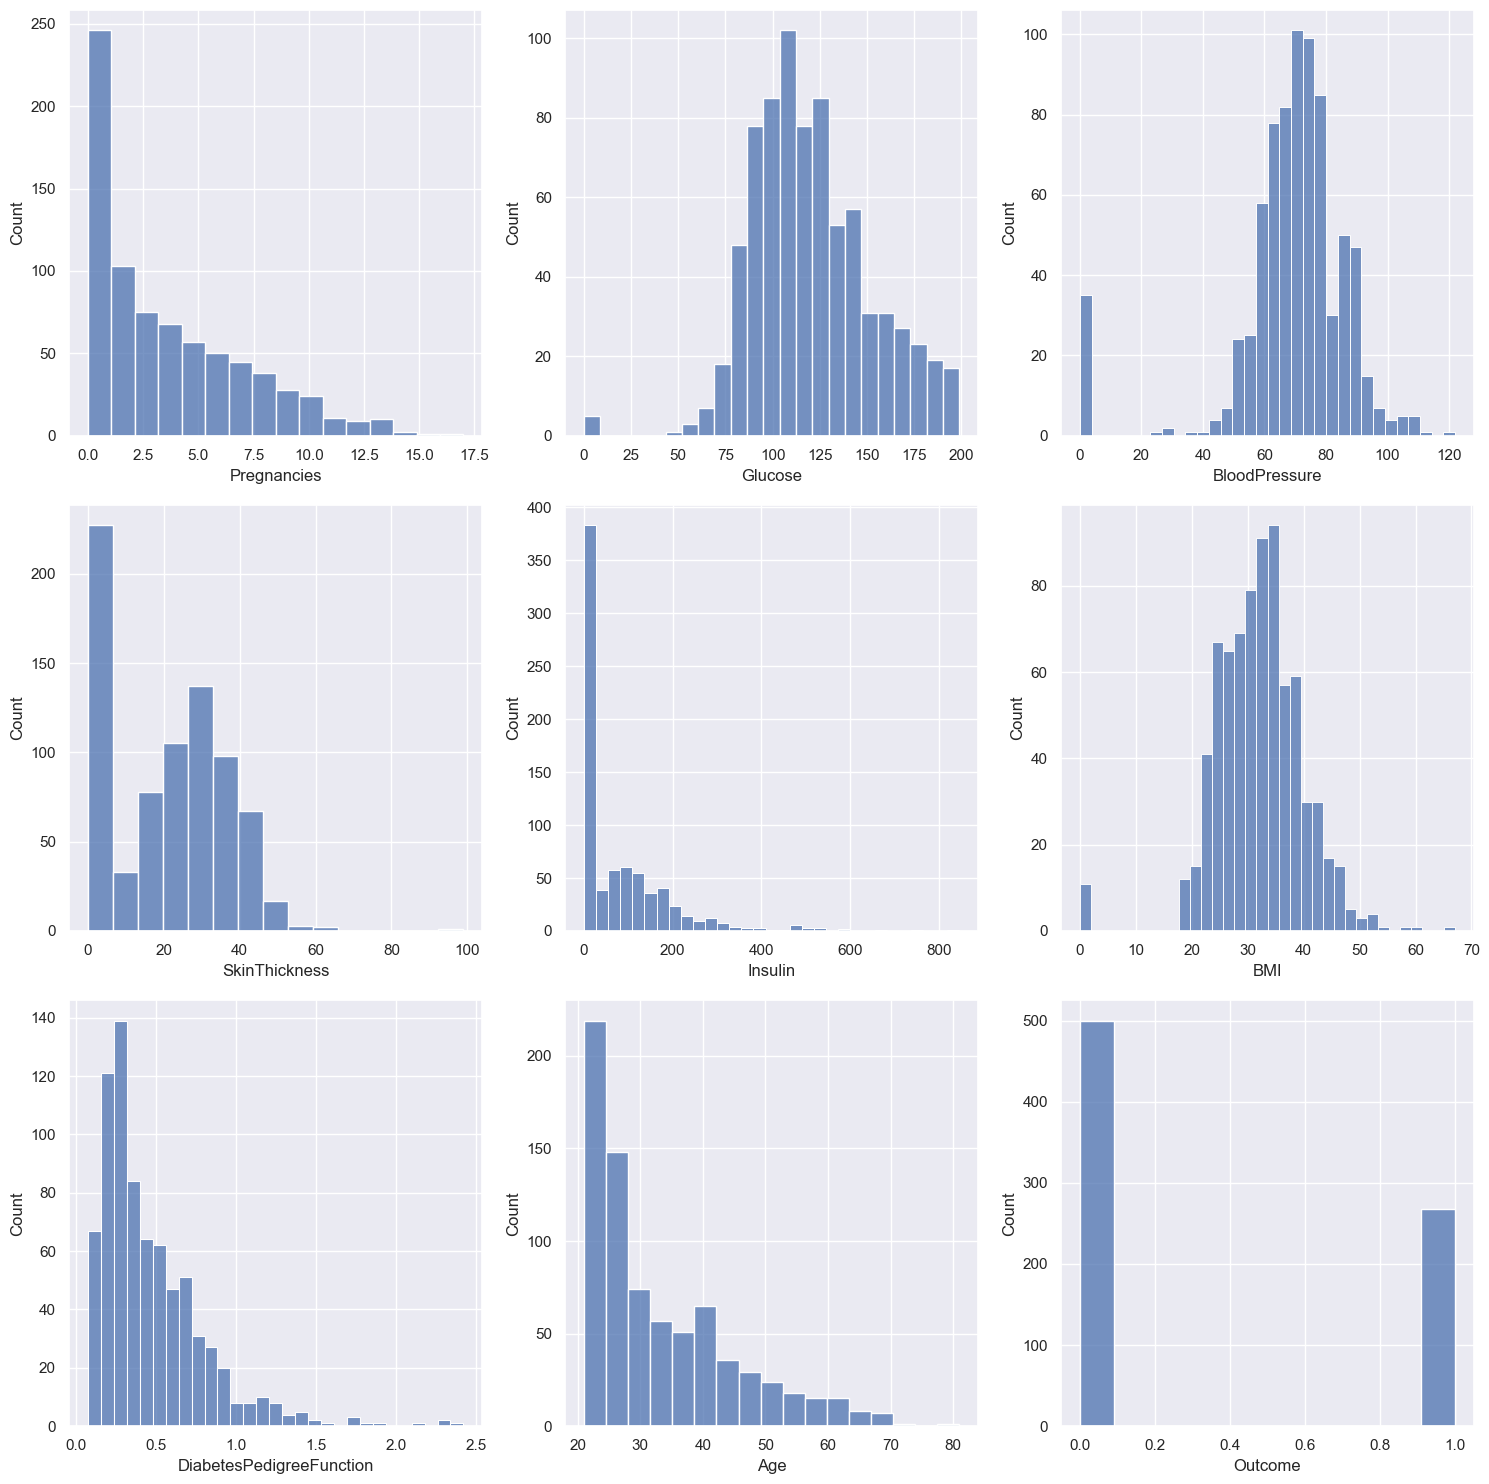

In [17]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), EDA_df.columns):
    sns.histplot(EDA_df[column], ax=ax)
    #ax.set_title(column)
    #ax.set_ylabel('')

plt.tight_layout()
plt.show()

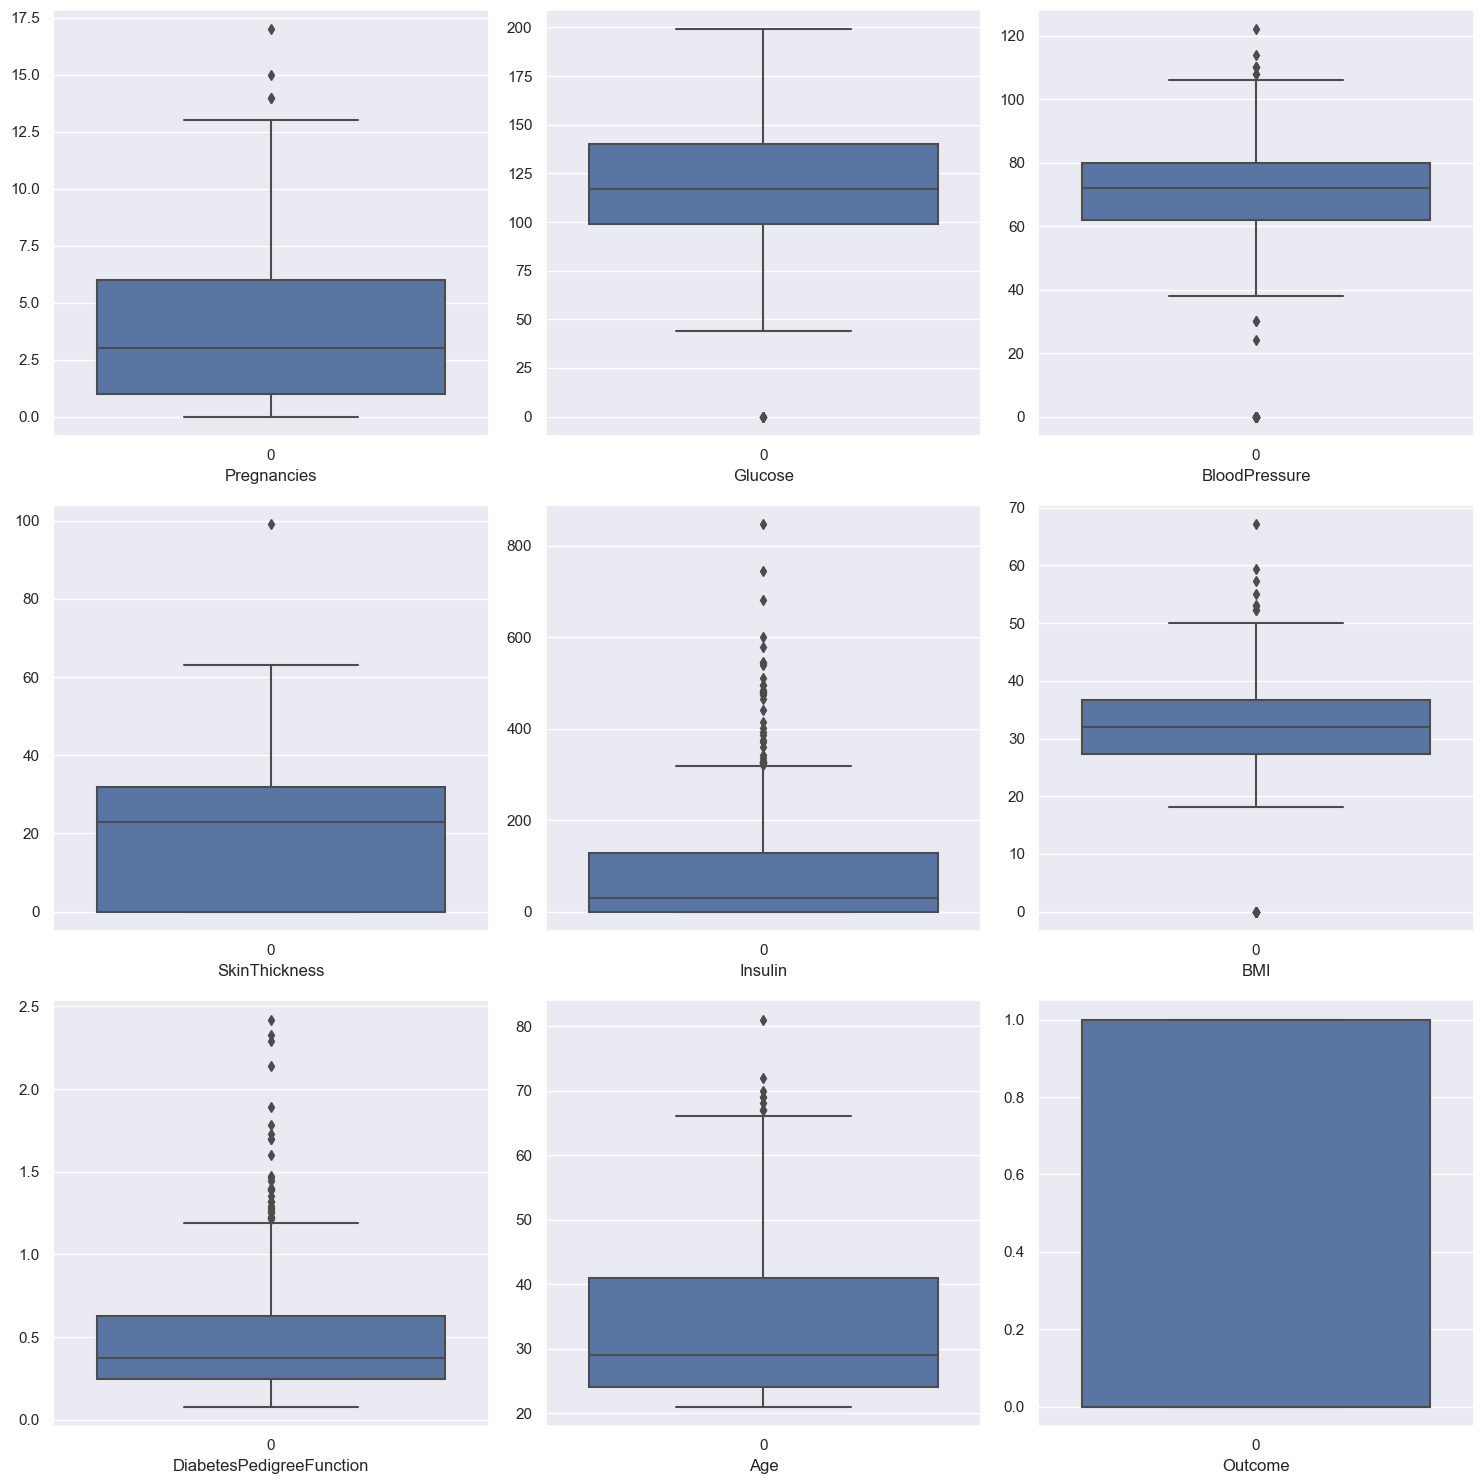

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), EDA_df.select_dtypes(include=['number']).columns):
    sns.boxplot(EDA_df[column], ax=ax)
    #ax.set_title(column)
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

In [20]:
EDA_df['SkinThickness'].value_counts().head()

0     227
32     31
30     27
27     23
23     22
Name: SkinThickness, dtype: int64

In [21]:
EDA_df['Insulin'].value_counts().head()

0      374
105     11
130      9
140      9
120      8
Name: Insulin, dtype: int64

In [26]:
EDA_df['BloodPressure'].value_counts().head(10)

70    57
74    52
78    45
68    45
72    44
64    43
80    40
76    39
60    37
0     35
Name: BloodPressure, dtype: int64

* `SkinThickness`, `Insulin`, `BloodPressure`, `Glucose`, and `BMI` contain zeros as values. This is atypical
* `SkinThickness` and `Insulin` contain a very high proportion of zero values, making them almost unuseable
* The zero values in `BloodPressure`, `Glucose`, and `BMI` can be imputed with median values, as they contain a relatively fewer proportion
* We can notice some outliers in the data especially in the `Insulin`, `Pregnancies`,and `DiabetesPedigreeFunction`. We shall deal with outliers in subsequent sections

In [30]:
# impute zero values with group median
median_values = EDA_df[['BloodPressure','Glucose','BMI']].median().to_list()
EDA_df.loc[EDA_df['BloodPressure']==0,'BloodPressure']=median_values[0]
EDA_df.loc[EDA_df['Glucose']==0,'Glucose']=median_values[1]
EDA_df.loc[EDA_df['BMI']==0,'BMI']=median_values[2]

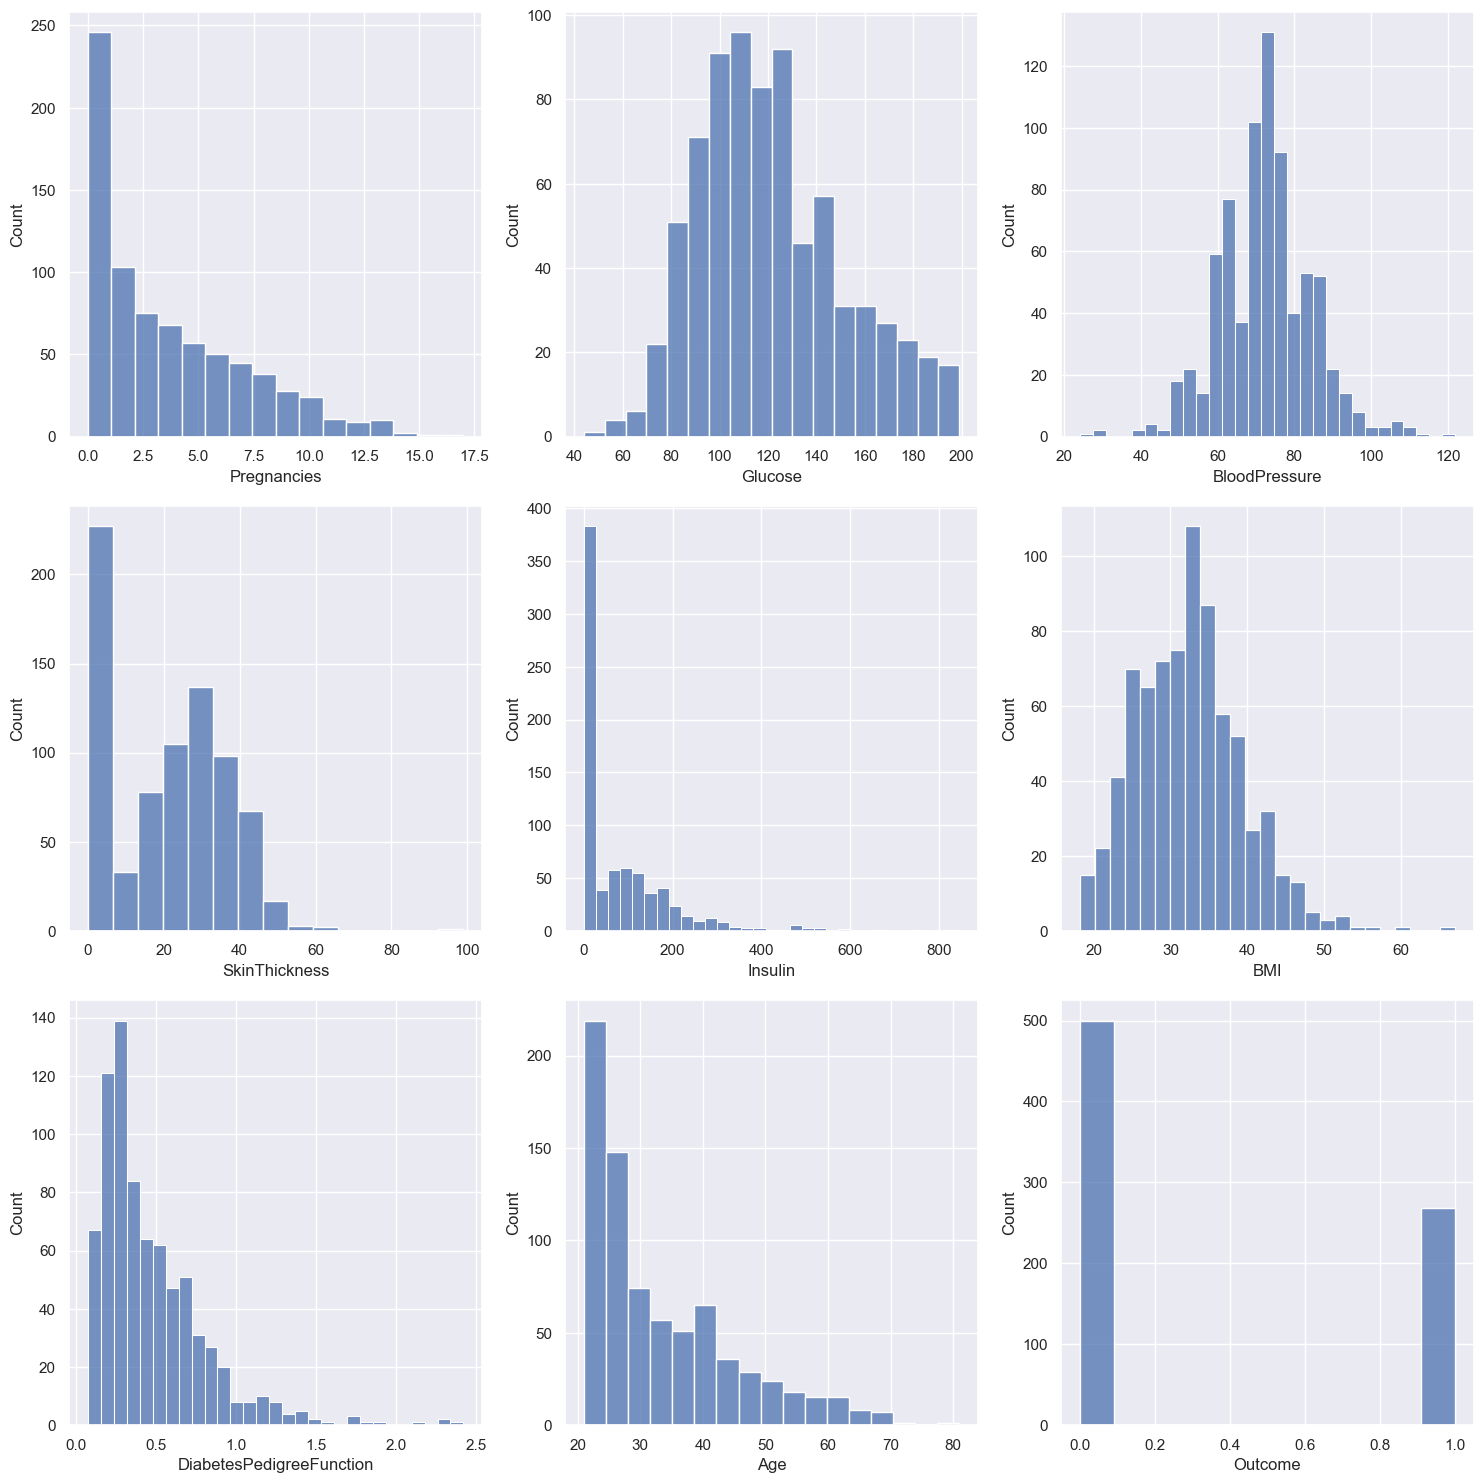

In [31]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), EDA_df.columns):
    sns.histplot(EDA_df[column], ax=ax)
    #ax.set_title(column)
    #ax.set_ylabel('')

plt.tight_layout()
plt.show()

We will proceed with the rest of the EDA and may potentially drop the `SkinThickness` and `Insulin` Columns

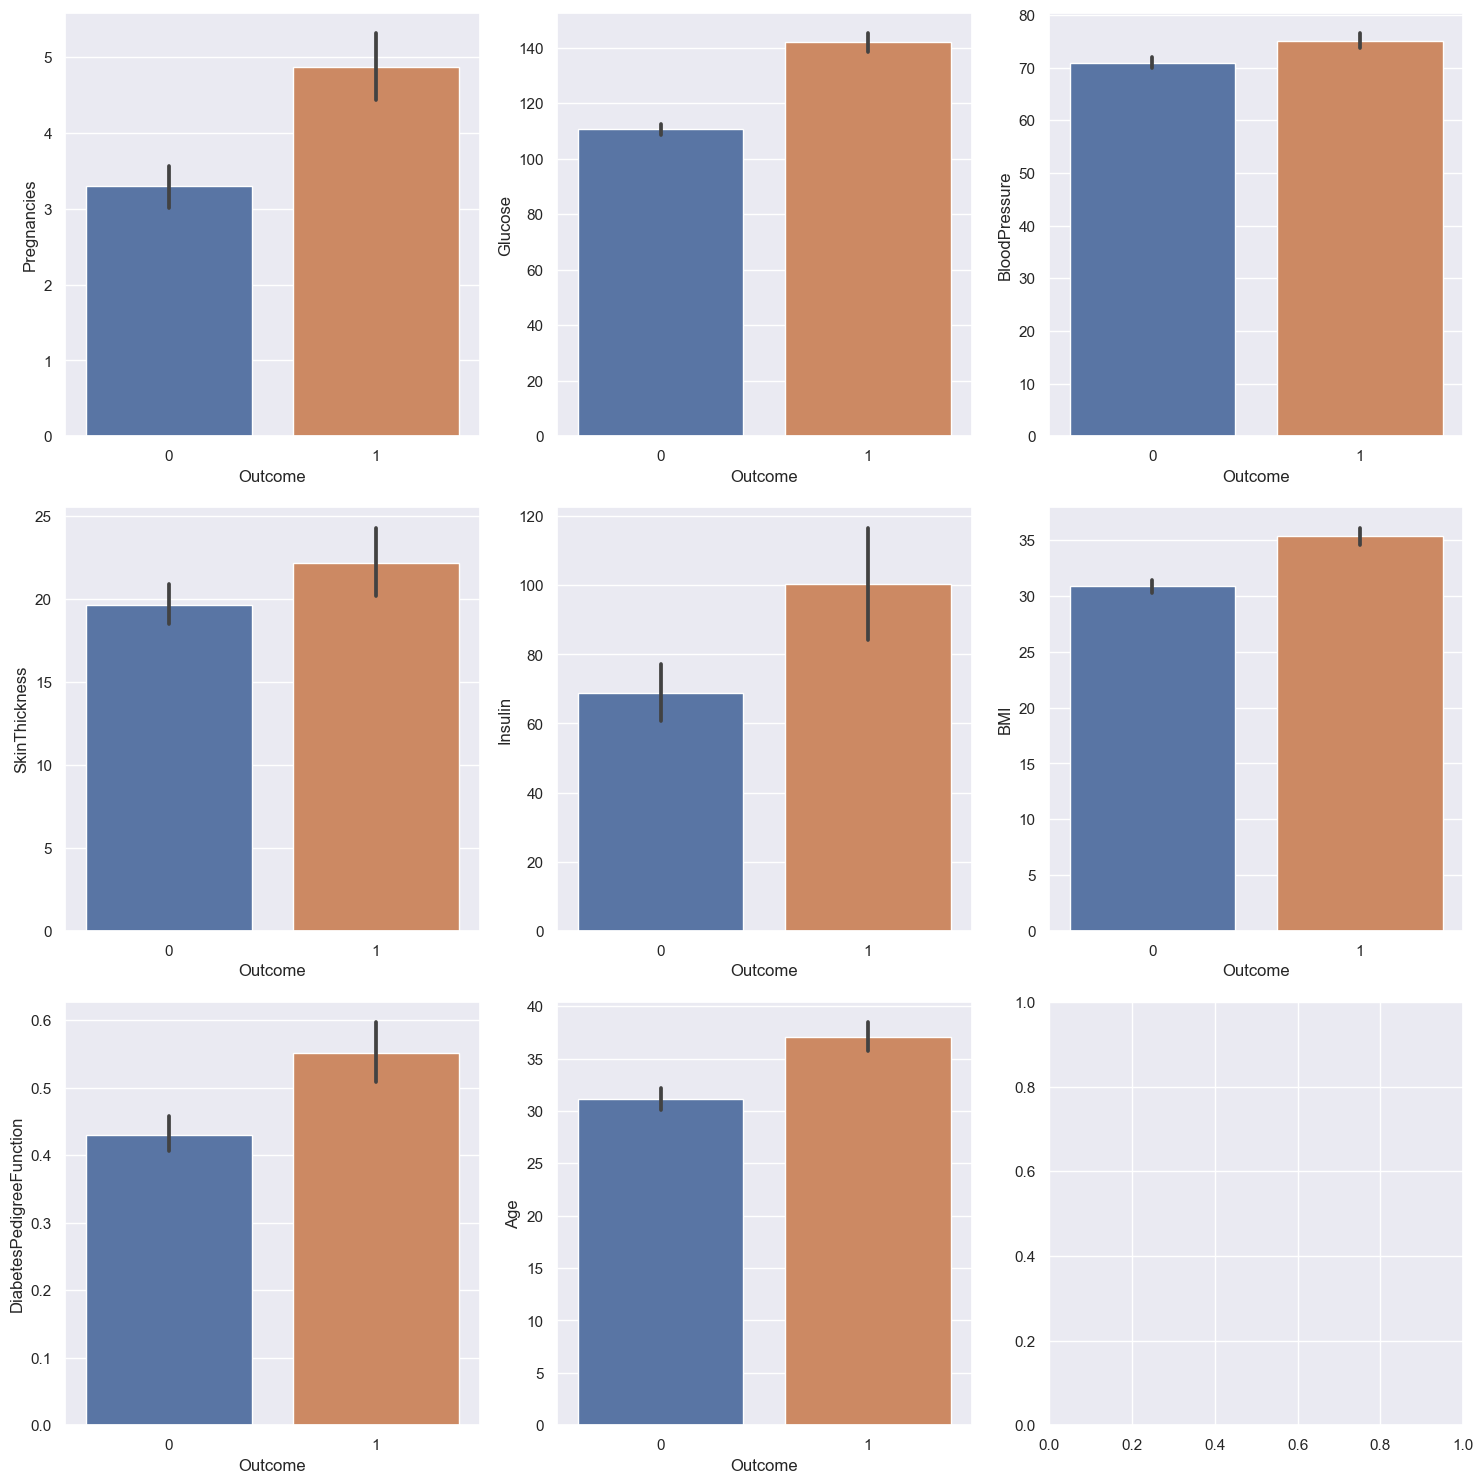

In [34]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), EDA_df.columns):
    if column != 'Outcome':
        sns.barplot(data=EDA_df, x='Outcome',y=column,ax=ax)
        #ax.set_title(column)
        #ax.set_ylabel('')

plt.tight_layout()
plt.show()



* From the exploratory analysis, the averages of the features seem differ between the groups with and without diabetes

Similarly, we can view the variations of the distributions in the numeric columns for those with or without diabetes
using violin plots

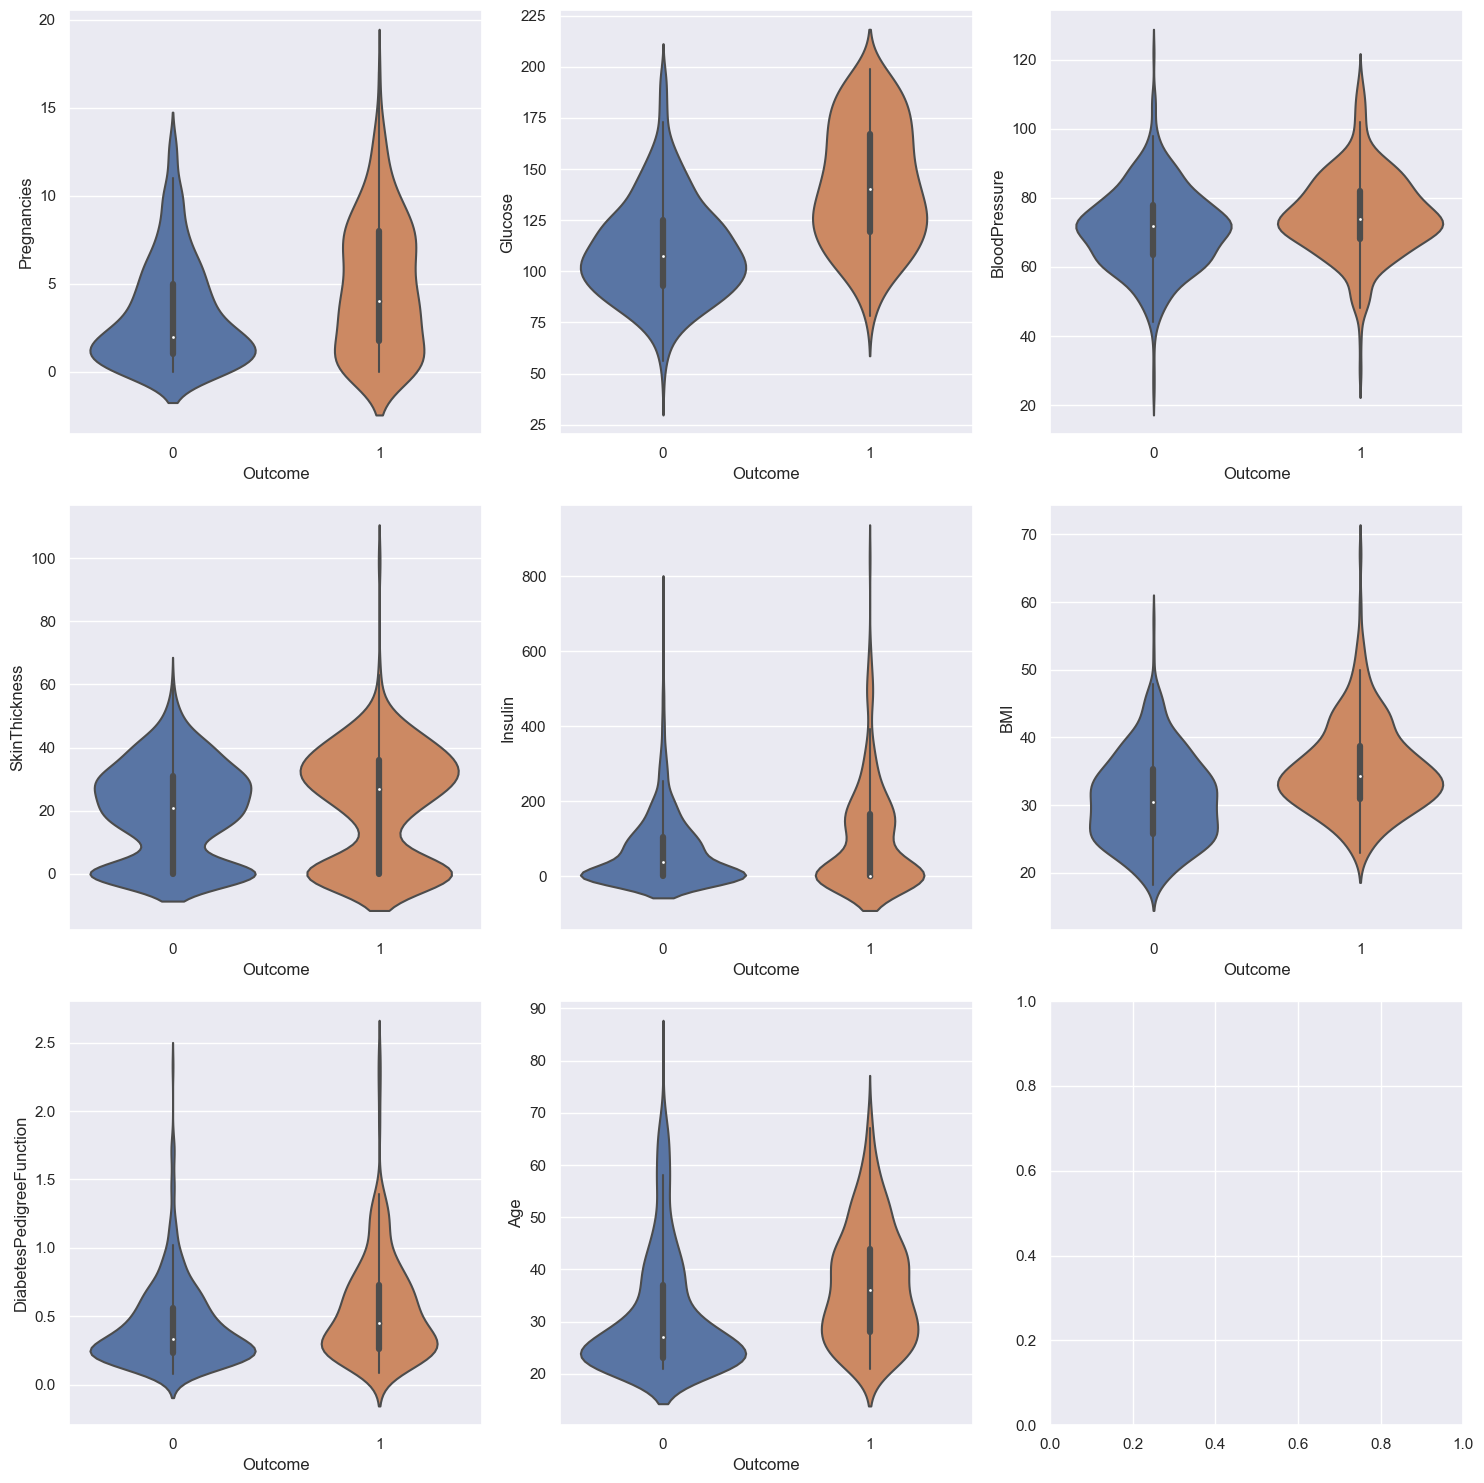

In [46]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), EDA_df.columns):
    if column != 'Outcome':
        sns.violinplot(data=EDA_df, x='Outcome', y=column, ax=ax)
        #sns.barplot(data=EDA_df, x='Outcome',y=column,ax=ax)
        #ax.set_title(column)
        #ax.set_ylabel('')

plt.tight_layout()
plt.show()

Ultimately, we would like to understand the factors that determine the presence of diabetes. As such, we would like to see, at a high level, how the various other attributes relate to it. A good way to view the important factors is by viewing the correlations between variables

In [47]:
# Since all columns are numeric, we can get the correlation matrix directly via
EDA_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,-0.081672,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.074455,0.331709,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.007937,-0.045769,0.281132,-0.002378,0.324915,0.165723
SkinThickness,-0.081672,0.074455,0.007937,1.000000,0.436783,0.381740,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331709,-0.045769,0.436783,1.000000,0.185356,0.185071,-0.042163,0.130548
BMI,0.021546,0.231400,0.281132,0.381740,0.185356,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.183928,0.185071,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,-0.113970,-0.042163,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.074752,0.130548,0.312249,0.173844,0.238356,1.000000


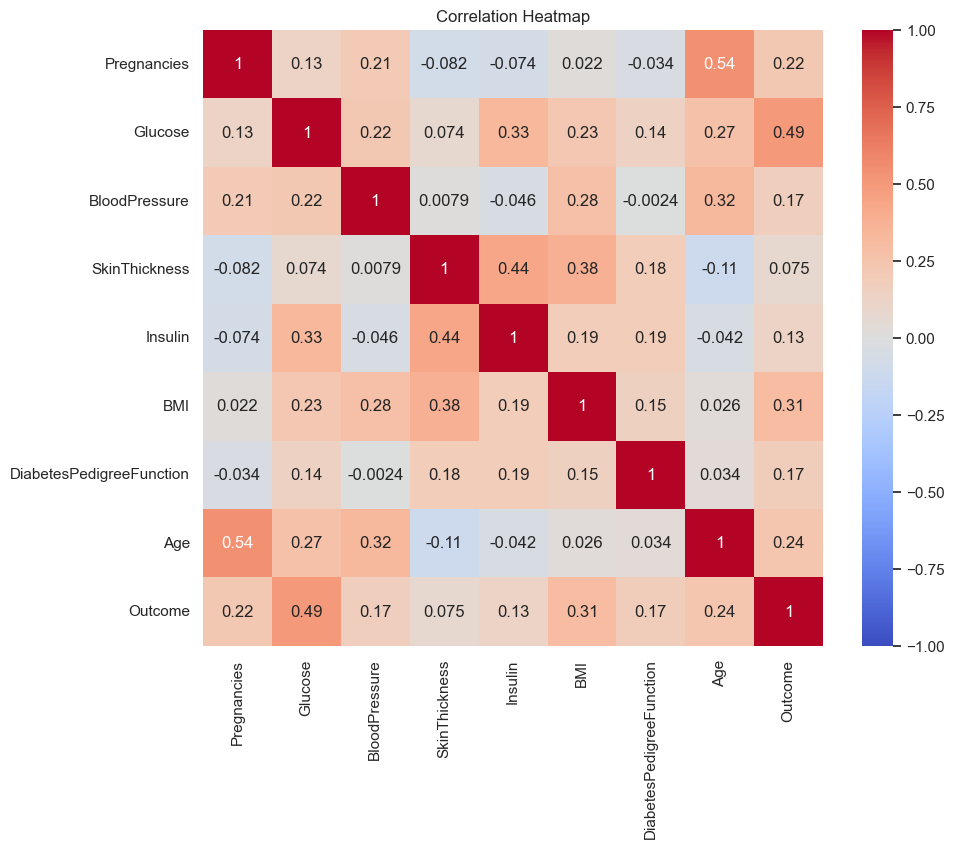

In [48]:
# Calculate correlation matrix
corr = EDA_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

* We can see clearly that `Glucose`, `BMI`, `Age`, `Pregnancies` have a high correlation with the presence of diabetes
* Unintuitively, `insulin` and `SkinThickness` do not seem to have as high a correlation as would be expected. I hypothesize that it is because of the problem in the data collection where a lot of the values in the columns are zero values. These two columns will be dropped going forward

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

Handling of missing values have been carried in the previous section.

In [52]:
# As noted earlier we will drop the `SkinThickness` and `Insulin` columns, while selecting the columns with 
# high correlation with the diabetes outcome. This constitutes part of feature engineering
desired_columns = EDA_df.columns[~EDA_df.columns.isin(['SkinThickness','Insulin'])]
df_design = EDA_df[desired_columns].copy()

In [53]:
# handle outliers
Q1 = df_design.quantile(0.25)
Q3 = df_design.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# define outlier condition
outlier_condition = ((df_design < lower_bound)|
                     (df_design > upper_bound)
                    )
df_design_removed_outliers = df_design[~outlier_condition]

In [57]:
df_design_removed_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               764 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             754 non-null    float64
 3   BMI                       760 non-null    float64
 4   DiabetesPedigreeFunction  739 non-null    float64
 5   Age                       759 non-null    float64
 6   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 64.2 KB


In [58]:
df_design_processing = df_design_removed_outliers.dropna()

In [60]:
df_design_processing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               707 non-null    float64
 1   Glucose                   707 non-null    int64  
 2   BloodPressure             707 non-null    float64
 3   BMI                       707 non-null    float64
 4   DiabetesPedigreeFunction  707 non-null    float64
 5   Age                       707 non-null    float64
 6   Outcome                   707 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 44.2 KB


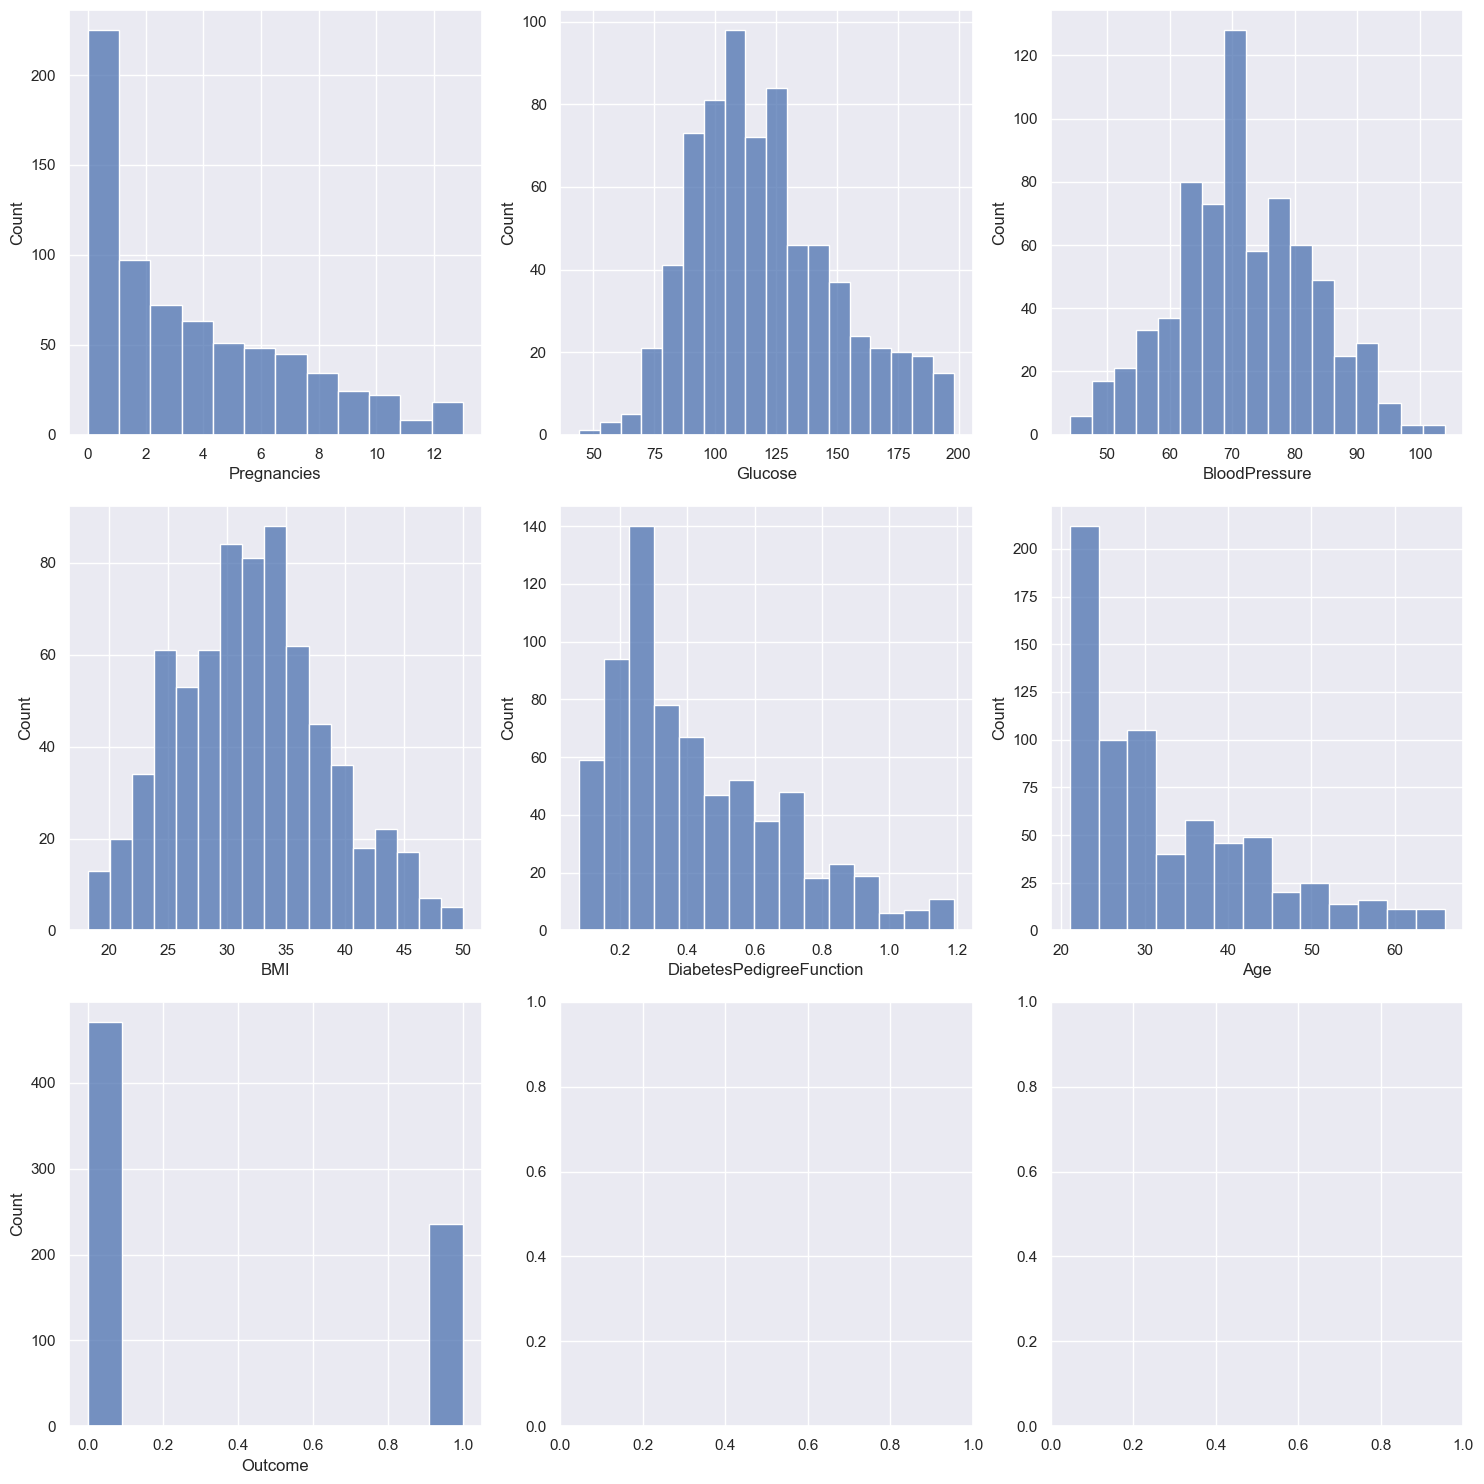

In [61]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), df_design_processing.columns):
    sns.histplot(df_design_processing[column], ax=ax)
    #ax.set_title(column)
    #ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [68]:
# split dataset into training and test subsets
features_columns = df_design_processing.columns[~df_design_processing.columns.isin(['Outcome'])]
dependent_column = 'Outcome'
RANDOM_STATE_CONST = 42

df_train, df_test = train_test_split(df_design_processing, test_size=0.2, 
                                     random_state=RANDOM_STATE_CONST, shuffle=True,stratify=df_design_processing[dependent_column])

View the distributions for the training and test split subsets to detect potential imbalance

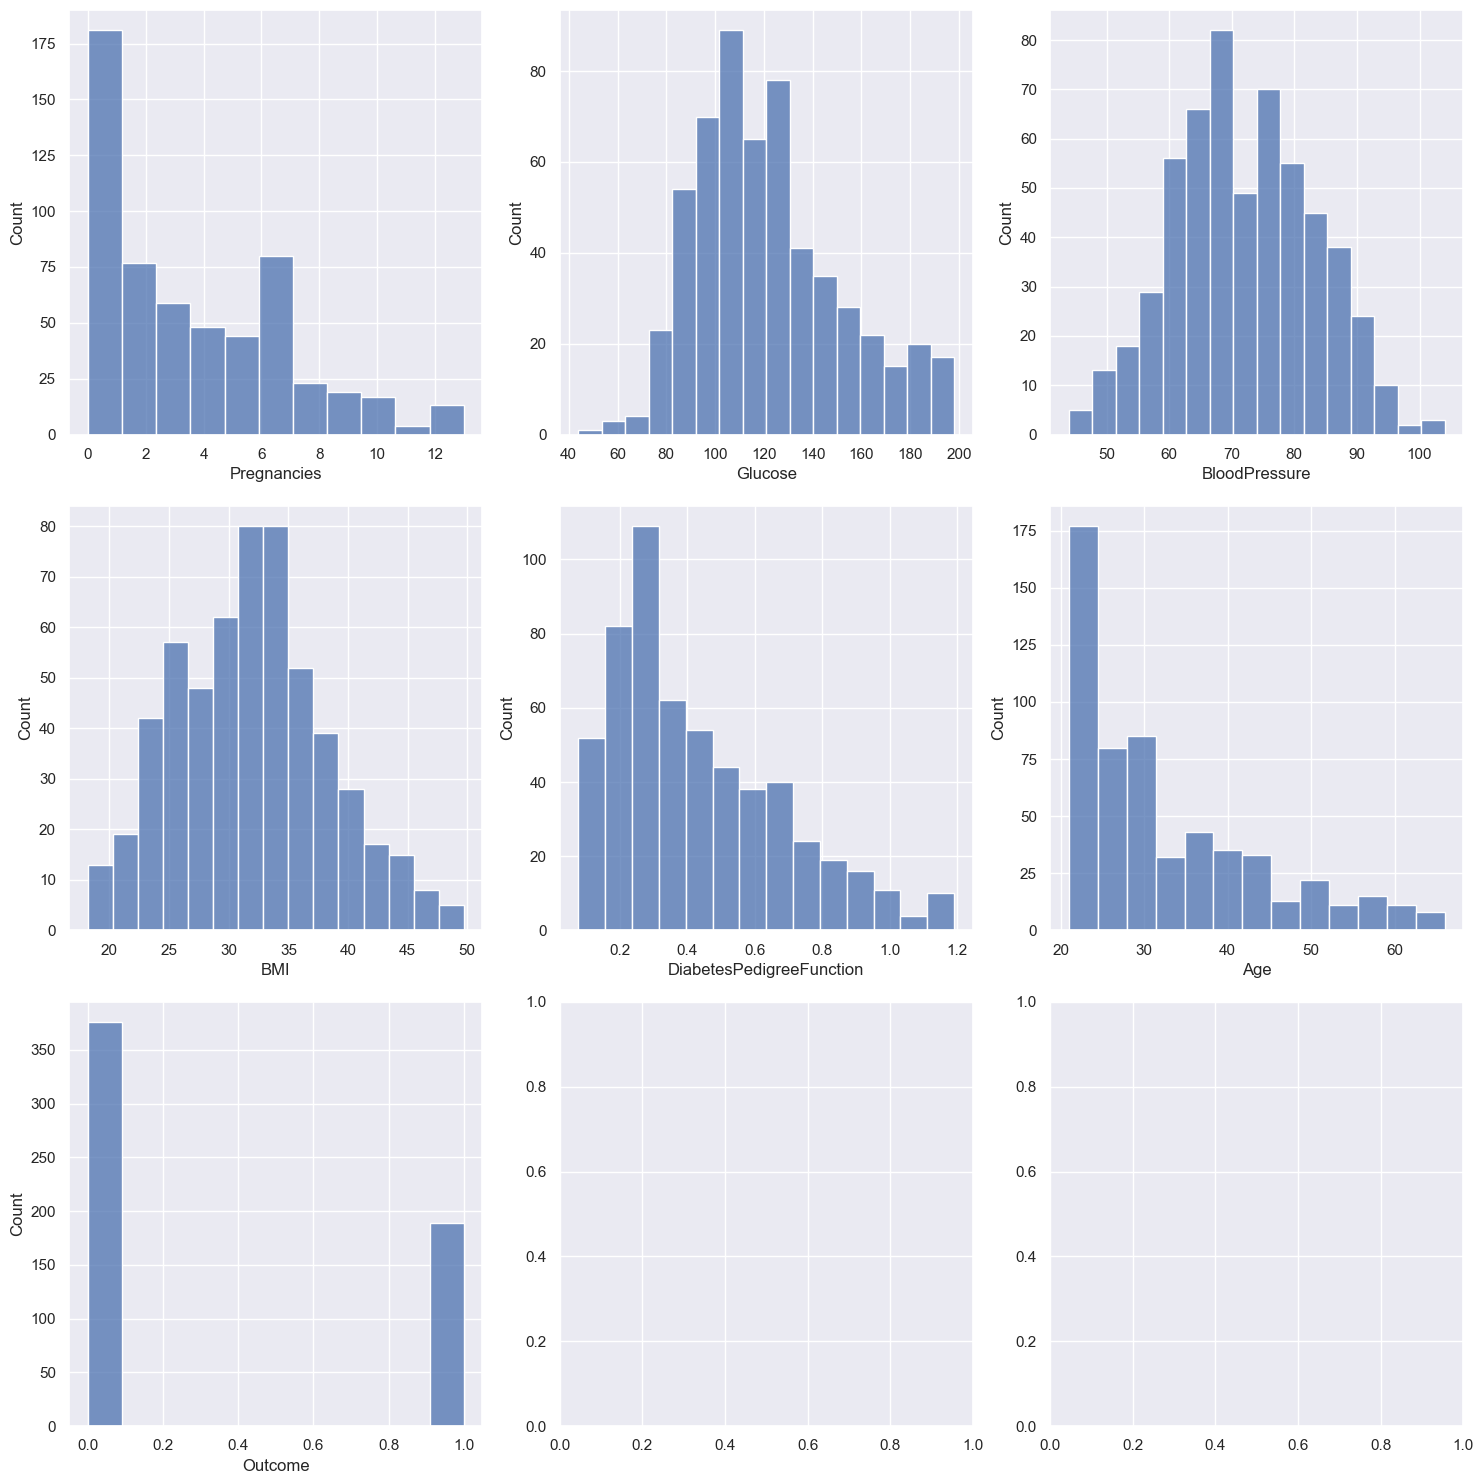

In [69]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), df_train.columns):
    sns.histplot(df_train[column], ax=ax)
    #ax.set_title(column)
    #ax.set_ylabel('')

plt.tight_layout()
plt.show()

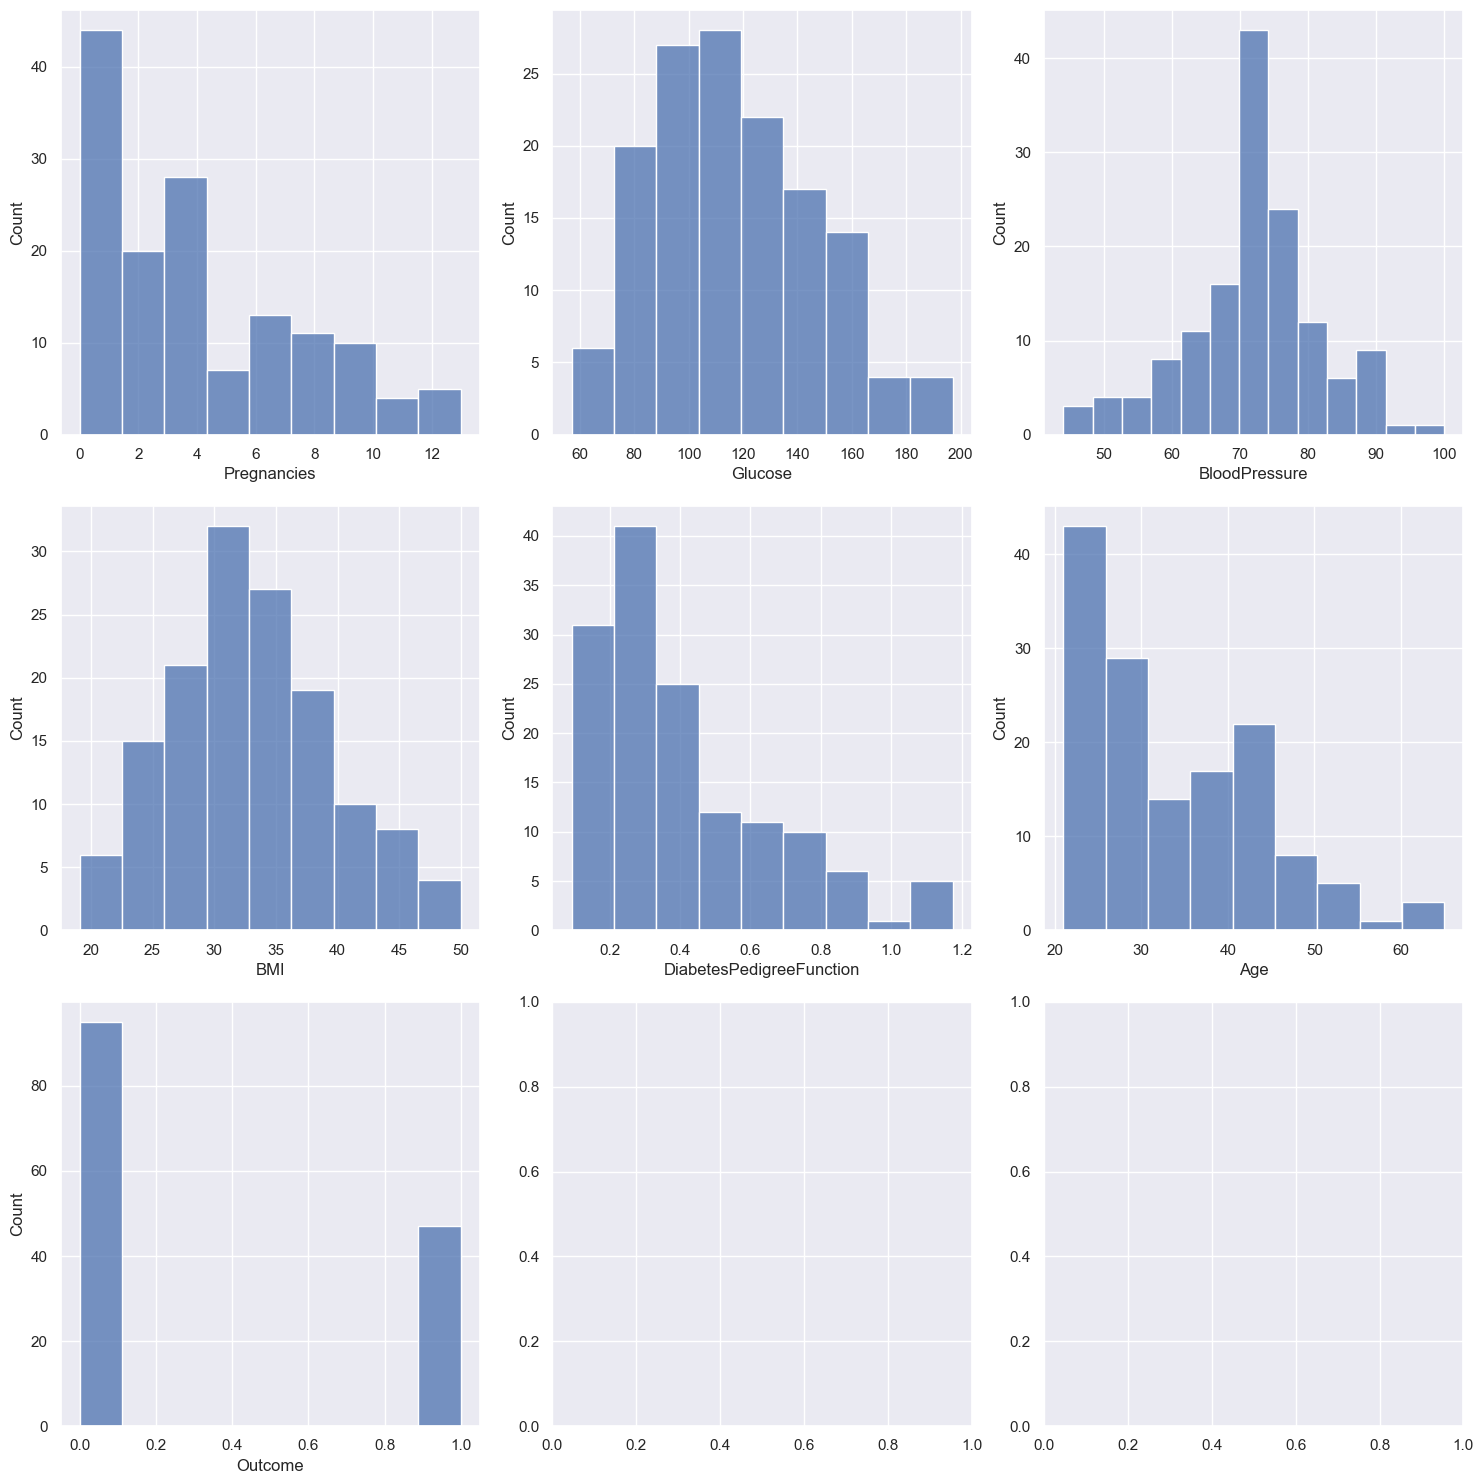

In [70]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), df_test.columns):
    sns.histplot(df_test[column], ax=ax)
    #ax.set_title(column)
    #ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [71]:
df_train['Outcome'].value_counts()

0    376
1    189
Name: Outcome, dtype: int64

In [72]:
df_test['Outcome'].value_counts()

0    95
1    47
Name: Outcome, dtype: int64

By Shuffling and specifying the stratify argument to the test_train_split function, we can see that the classes are balanced between the training and test datasets. We now proceed to scaling the data to improve numerical conditioning

In [81]:
# Scaling

# separate features
X_train = df_train[features_columns]
y_train = df_train[dependent_column]
X_test = df_test[features_columns]
y_test = df_test[dependent_column]

# initiatiate scalar
scaler = StandardScaler()
# compute the mean and standard deviation parameters from the dataset before transforming it
scaler.fit(X_train)

# now scale/transform the datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

We will consider three model classes for this section. They are
* Logistic regression classifier
* SVC
* Random Forest classifier.

We will use GridSearch from the sklearn library to automate this process. This process will involve parameter tuning and cross validation with the training dataset. Afterwards, the selected model(s) will be evaluated using the test dataset.

In [114]:
# Define parameter grids for each model class
param_grid_lr = {
    'C': [0.01, 0.1, 1.0, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  
}
param_grid_svc = {
    'C': [0.1, 1.0, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 2,4,6,10, 20, 30],
    'min_samples_split': [2, 4, 6],
    #'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# List to store the best models
best_models = []

# Run GridSearchCV for LogisticRegression
print('Running grid search for LogisticRegression')
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5,scoring='f1')
grid_search_lr.fit(X_train_scaled, y_train)
best_models.append(grid_search_lr.best_estimator_)

# Run GridSearchCV for SVC
print('Running grid search for SVC')
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5,scoring='f1')
grid_search_svc.fit(X_train_scaled, y_train)
best_models.append(grid_search_svc.best_estimator_)

# Run GridSearchCV for RandomForestClassifier
print('Running grid search for RandomForestClassifier')
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5,scoring ='f1')
grid_search_rf.fit(X_train_scaled, y_train)
best_models.append(grid_search_rf.best_estimator_)

Running grid search for LogisticRegression
Running grid search for SVC
Running grid search for RandomForestClassifier


In [115]:
# Evaluate each best model on the test set
for model in best_models:
    test_predictions = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"{model.__class__.__name__} test set accuracy: {test_accuracy:.2f}")

LogisticRegression test set accuracy: 0.75
SVC test set accuracy: 0.77
RandomForestClassifier test set accuracy: 0.81


In [116]:
def evaluate_model_performance(model):
    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)
    
    # training dataset evaluation
    train_accuracy = accuracy_score(y_train,train_predictions)
    train_precision = precision_score(y_train,train_predictions)
    train_recall = recall_score(y_train,train_predictions)
    train_f1 = f1_score(y_train,train_predictions)
    train_roc_auc = roc_auc_score(y_train,train_predictions)
    
    # test dataset evaluation
    test_accuracy = accuracy_score(y_test,test_predictions)
    test_precision = precision_score(y_test,test_predictions)
    test_recall = recall_score(y_test,test_predictions)
    test_f1 = f1_score(y_test,test_predictions)
    test_roc_auc = roc_auc_score(y_test,test_predictions)
    
    data = { 'accuracy': [train_accuracy, test_accuracy],
            'precision': [train_precision, test_precision],
            'recall': [train_recall, test_recall],
            'f1': [train_f1, test_f1],
            'roc_auc': [train_roc_auc,test_roc_auc]
    }
    index_names = [f"{model.__class__.__name__} train", f"{model.__class__.__name__} test"]
    
    df = pd.DataFrame(data, index=index_names)
    
    return df
    
    

In [117]:
store_performance_df = []
for model in best_models:
    store_performance_df.append(evaluate_model_performance(model))
stacked_performance_df = pd.concat(store_performance_df, axis=0)

In [118]:
stacked_performance_df

,accuracy,precision,recall,f1,roc_auc
LogisticRegression train,0.773451,0.674286,0.624339,0.648352,0.736371
LogisticRegression test,0.746479,0.641026,0.531915,0.581395,0.692273
SVC train,0.775221,0.718310,0.539683,0.616314,0.716650
SVC test,0.774648,0.714286,0.531915,0.609756,0.713326
RandomForestClassifier train,1.000000,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier test,0.809859,0.794118,0.574468,0.666667,0.750392


The Random Forest classifier has the best performance overall among the evaluated metrics, followed by the SVC and then the Logistic Regression model. The ROC_AUC score shows a balanced performance for the three evaluated models. However, the models seem to fail to identify several positive cases as evidenced by their relatively lower recall scores. If there was more time, more featuring engineering such as reselecting the most important features as obtained below, would be done to improve performance even further.

In [88]:
feature_importances = grid_search_rf.best_estimator_.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
feature_names = features_columns
# Print the feature rankings
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

Glucose: 0.30287836588948974
BMI: 0.18375555269020263
Age: 0.17199837949687272
DiabetesPedigreeFunction: 0.1472962634465721
Pregnancies: 0.09921384816489548
BloodPressure: 0.09485759031196733


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

* Overall, the risk  factors present in the dataset seem to have predictive values in determining if a patient has diabetes, as evidenced by the difference in average mean and distributions for those with and without positive outcome
* `Glucose`, `BMI`, and `Age` seem to be the most important risk factors for detecting diabetes as evidenced by the correlation map and feature importance scores
* Logistic, SVC, and Random Forest classifiers can be successfully used to predict the presence of diabetes in a given patient based on the identified risk factors
* Overall, Random Forest classifier showed the best and most balance performance in generalizing to new data.